In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
import albumentations as alb
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D, AvgPool2D, MaxPooling2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
import random
from sklearn.model_selection import train_test_split
import math

In [3]:
# !unzip '/content/drive/MyDrive/project_2/Face_reg_2.zip'

Archive:  /content/drive/MyDrive/project_2/Face_reg_2.zip
   creating: Face_reg 2/anh binh thuong/
  inflating: Face_reg 2/anh binh thuong/a_1.jpg  
  inflating: Face_reg 2/anh binh thuong/a_10.jpg  
  inflating: Face_reg 2/anh binh thuong/a_11.jpg  
  inflating: Face_reg 2/anh binh thuong/a_12.jpg  
  inflating: Face_reg 2/anh binh thuong/a_13.jpg  
  inflating: Face_reg 2/anh binh thuong/a_14.jpg  
  inflating: Face_reg 2/anh binh thuong/a_15.jpg  
  inflating: Face_reg 2/anh binh thuong/a_16.jpg  
  inflating: Face_reg 2/anh binh thuong/a_17.jpg  
  inflating: Face_reg 2/anh binh thuong/a_18.jpg  
  inflating: Face_reg 2/anh binh thuong/a_19.jpg  
  inflating: Face_reg 2/anh binh thuong/a_2.jpg  
  inflating: Face_reg 2/anh binh thuong/a_20.jpg  
  inflating: Face_reg 2/anh binh thuong/a_21.jpg  
  inflating: Face_reg 2/anh binh thuong/a_22.jpg  
  inflating: Face_reg 2/anh binh thuong/a_23.jpg  
  inflating: Face_reg 2/anh binh thuong/a_24.jpg  
  inflating: Face_reg 2/anh binh thu

In [6]:
import glob
images_path = glob.glob('/Users/ducmanhhoang/Desktop/Face_reg 2/anh binh thuong/*.jpg')
labels_path = glob.glob('/Users/ducmanhhoang/Desktop/Face_reg 2/labels/*.json')

In [7]:
labels_path

['/Users/ducmanhhoang/Desktop/Face_reg 2/labels/c_27.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/c_31.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/b_30.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/a_20.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/b_26.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/a_36.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/a_41.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/b_3.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/a_16.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/b_10.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/c_7.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/c_11.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/a_6.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/a_7.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/c_10.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/labels/b_11.json',
 '/Users/ducmanhhoang/Desktop/Face_reg 2/lab

In [6]:
# x = 1
# image_name = images_path[0].split('/')[4].split('.')[0]
# y = os.path.join('/content/Face_reg 2/aug/Images/', f'{image_name}.{x}.jpg')
# y

In [7]:
# label

# AUGMENTATION

In [8]:
augmentor = alb.Compose([alb.RandomCrop(width=900, height=900),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

#TEST

[0.3876953125, 0.27199074074074076, 0.6513671875, 0.7696759259259259]
(0.2693055555555556, 0.2986111111111111, 0.8318055555555556, 0.8958333333333334)


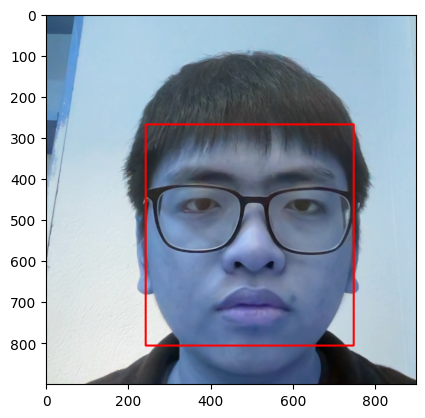

In [9]:
img = cv2.imread('/content/Face_reg 2/anh binh thuong/a_1.jpg')
with open(('/content/Face_reg 2/labels/a_1.json'), 'r') as f:
     label = json.load(f)
# # coords = [0,0,0,0]
# # coords[0] = int(label['shapes'][0]['points'][0][0])
# # coords[1] = int(label['shapes'][0]['points'][0][1])
# # coords[2] = int(label['shapes'][0]['points'][1][0])
# # coords[3] = int(label['shapes'][0]['points'][1][1])

# img = cv2.rectangle(img,[coords[0],coords[1]], [coords[2],coords[3]],(255,0,0),3 )
# plt.imshow(img)

coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords = list(np.divide(coords, [1920,1080,1920,1080]))
print(coords)
augmented = augmentor(image=img, bboxes= [coords], class_labels=['face'])
print(augmented['bboxes'][0])
x = cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [900,900]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [900,900]).astype(int)),
                    (255,0,0), 3)

plt.imshow(x)
del x, img, label,coords

In [10]:
with open((labels_path[0]), 'r') as f:
    label = json.load(f)

In [11]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

# CREATE FOLDER FOR STORE AUG DATA

In [15]:
# folder = 'aug'
# parent = '/Users/ducmanhhoang/Desktop/Face_reg 2'
# path = os.path.join(parent, folder)
# os.mkdir(path)
os.mkdir(os.path.join('/Users/ducmanhhoang/Desktop/Face_reg 2/aug','Images'))
os.mkdir(os.path.join('/Users/ducmanhhoang/Desktop/Face_reg 2/aug','Labels'))

FileExistsError: [Errno 17] File exists: '/Users/ducmanhhoang/Desktop/Face_reg 2/aug/Images'

# AUGUMENTATION

In [16]:
for i in range(len(images_path)):
  img = cv2.imread(images_path[i])
  image_name = images_path[i].split('/')[4].split('.')[0]
  coords = [0,0,0,0]
  for j in range(len(labels_path)):

    label_path = labels_path[j]
    label_name = labels_path[j].split('/')[4].split('.')[0]

    if image_name == label_name:
      print(image_name)
      print(label_name)
      with open(labels_path[j], 'r') as f:
        label = json.load(f)
      coords[0] = label['shapes'][0]['points'][0][0]
      coords[1] = label['shapes'][0]['points'][0][1]
      coords[2] = label['shapes'][0]['points'][1][0]
      coords[3] = label['shapes'][0]['points'][1][1]
      coords = list(np.divide(coords, [label['imageWidth'],label['imageHeight'],label['imageWidth'],label['imageHeight']]))

      for x in range(60):
        augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
        cv2.imwrite(os.path.join('/content/Face_reg 2/aug/Images', f'{image_name}.{x}.jpg'), augmented['image'])

        annotation = {}

        if os.path.exists(label_path):
          if len(augmented['bboxes']) == 0:
            annotation['bbox'] = [0,0,0,0]
            annotation['class'] = 0
          else:
              annotation['bbox'] = augmented['bboxes'][0]
              annotation['class'] = 1
        else:
          annotation['bbox'] = [0,0,0,0]
          annotation['class'] = 0


        with open(os.path.join('/content/Face_reg 2/aug/Labels', f'{image_name}.{x}.json'), 'w') as f:
          json.dump(annotation, f)


Face_reg 2
Face_reg 2


FileNotFoundError: [Errno 2] No such file or directory: '/content/Face_reg 2/aug/Labels/Face_reg 2.0.json'

# TEST

In [14]:
x = glob.glob('/content/Face_reg 2/aug/Labels/*.json')
y = glob.glob('/content/Face_reg 2/aug/Images/*.jpg')
print(len(x),len(y))

7320 7320


In [15]:
print(y[0])
print(y[0].split('/')[5].split('.jpg')[0])

/content/Face_reg 2/aug/Images/a_39.29.jpg
a_39.29


In [16]:
i = random.randint(0,7000)
with open(x[i], 'r') as f:
  label = json.load(f)

In [17]:
label

{'bbox': [0.5218055555555555, 0.0, 1.0, 0.7019444444444445], 'class': 1}

c_29.31
c_29.31 c_29.31


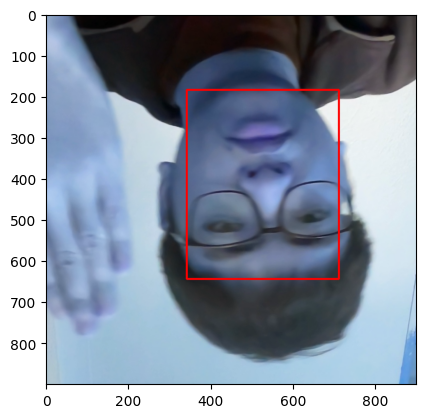

In [18]:
i = random.randint(0,7000)

name_img = y[i].split('/')[5].split('.jpg')[0]
print(name_img)

for j in range(len(x)):
  name_path = x[j].split('/')[5].split('.json')[0]
  if name_img == name_path:
    print(name_img, name_path)

    with open(x[j], 'r') as f:
      label = json.load(f)
    img = cv2.imread(y[i])
    if label['class'] == 1:
      z = cv2.rectangle(img,
                tuple(np.multiply(label['bbox'][:2], [900,900]).astype(int)),
                tuple(np.multiply(label['bbox'][2:], [900,900]).astype(int)),
                      (255,0,0), 3)
      plt.imshow(z)
    else:
      plt.imshow(img)


# DEFINE DATA


In [19]:
aug_images_path = glob.glob('/content/Face_reg 2/aug/Images/*.jpg')
aug_labels_path = glob.glob('/content/Face_reg 2/aug/Labels/*.json')
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [20]:
Images = []
Labels = []
for i in range(len(aug_images_path)):
  image_name = aug_images_path[i].split('/')[5].split('.jpg')[0]
  for j in range(len(aug_labels_path)):
    label_name = aug_labels_path[j].split('/')[5].split('.json')[0]
    if image_name == label_name:
      Images.append(aug_images_path[i])
      Labels.append(aug_labels_path[j])

del image_name, label_name,i,j

In [21]:
x_train, x_test, y_train, y_test = train_test_split(Images, Labels, test_size = 0.3)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size = 0.2)

In [22]:
x_train = tf.data.experimental.from_list(x_train)
x_test = tf.data.experimental.from_list(x_test)
y_train = tf.data.experimental.from_list(y_train)
y_test = tf.data.experimental.from_list(y_test)
x_val = tf.data.experimental.from_list(x_val)
y_val = tf.data.experimental.from_list(y_val)

In [23]:
train_images = x_train.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [24]:
test_images = x_test.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)


val_images = x_val.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [25]:
del x_train, x_test,x_val

In [26]:
train_images.as_numpy_iterator().next()

array([[[0.23970588, 0.19362745, 0.15441176],
        [0.5382353 , 0.41004902, 0.34313726],
        [0.6870098 , 0.52230394, 0.42794117],
        ...,
        [0.7526961 , 0.7526961 , 0.71544117],
        [0.68921566, 0.6901961 , 0.6343137 ],
        [0.6125    , 0.5948529 , 0.5203431 ]],

       [[0.4379902 , 0.35220587, 0.2870098 ],
        [0.6453431 , 0.48897058, 0.39142156],
        [0.7262255 , 0.5536765 , 0.45563725],
        ...,
        [0.67941177, 0.67156863, 0.6132353 ],
        [0.5977941 , 0.57034314, 0.4997549 ],
        [0.5656863 , 0.54313725, 0.45686275]],

       [[0.5772059 , 0.45563725, 0.36053923],
        [0.7058824 , 0.5411765 , 0.44313726],
        [0.7558824 , 0.59117645, 0.4970588 ],
        ...,
        [0.5718137 , 0.5504902 , 0.49485293],
        [0.54313725, 0.5156863 , 0.44509804],
        [0.52916664, 0.5095588 , 0.43112746]],

       ...,

       [[0.8272059 , 0.7370098 , 0.6036765 ],
        [0.8186275 , 0.74019605, 0.60294116],
        [0.81078434, 0

In [27]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

In [28]:
train_labels = y_train.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
test_labels = y_test.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
val_labels = y_val.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [29]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [30]:
train.as_numpy_iterator().next()

(array([[[[0.5115196 , 0.42034313, 0.2870098 ],
          [0.50759804, 0.41740197, 0.29191175],
          [0.4987745 , 0.42132354, 0.29289216],
          ...,
          [0.74289215, 0.68014705, 0.5477941 ],
          [0.74509805, 0.68235296, 0.55      ],
          [0.7411765 , 0.6784314 , 0.54607844]],
 
         [[0.5088235 , 0.42745098, 0.29117647],
          [0.5176471 , 0.42745098, 0.3019608 ],
          [0.5058824 , 0.43137255, 0.30588236],
          ...,
          [0.7372549 , 0.6862745 , 0.5529412 ],
          [0.7379902 , 0.6791667 , 0.5497549 ],
          [0.7382353 , 0.6784314 , 0.54901963]],
 
         [[0.51862746, 0.44019607, 0.3107843 ],
          [0.52156866, 0.4392157 , 0.31764707],
          [0.52843136, 0.43823528, 0.31666666],
          ...,
          [0.74509805, 0.6862745 , 0.5647059 ],
          [0.74509805, 0.6862745 , 0.5647059 ],
          [0.7443628 , 0.6855392 , 0.56397057]],
 
         ...,
 
         [[0.7848039 , 0.8333333 , 0.8183824 ],
          [0.33848

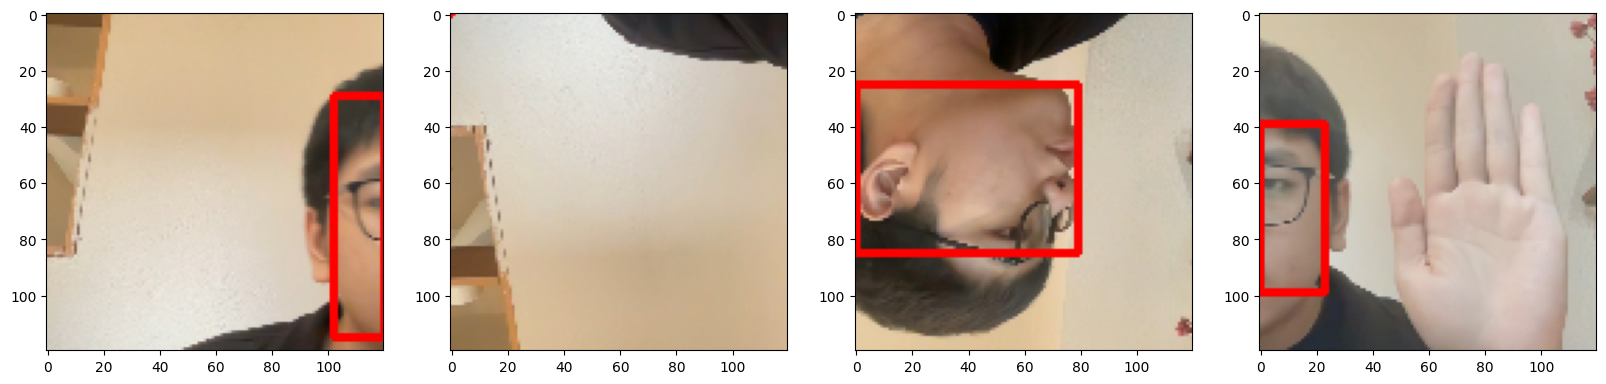

In [31]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# MODEL


In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [33]:
vgg = VGG16(include_top=False)
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [34]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [35]:
facetracker = build_model()
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [36]:
opt = tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001
)

In [37]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size


In [38]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [39]:
class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [40]:
model = FaceTracker(facetracker)
model.compile(opt, classloss, regressloss)

In [41]:
facetracker.save('25_03_2024.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
hist = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
641/641 [==============================] - 3394s 5s/step - total_loss: 0.3808 - class_loss: 0.0807 - regress_loss: 0.3405 - val_total_loss: 0.3365 - val_class_loss: 0.0510 - val_regress_loss: 0.3110
Epoch 2/10
641/641 [==============================] - 3274s 5s/step - total_loss: 0.1956 - class_loss: 0.0473 - regress_loss: 0.1720 - val_total_loss: 0.2032 - val_class_loss: 0.0850 - val_regress_loss: 0.1607
Epoch 3/10
641/641 [==============================] - 3139s 5s/step - total_loss: 0.1695 - class_loss: 0.0420 - regress_loss: 0.1485 - val_total_loss: 0.0705 - val_class_loss: 6.6379e-04 - val_regress_loss: 0.0701
Epoch 4/10
641/641 [==============================] - 3059s 5s/step - total_loss: 0.1360 - class_loss: 0.0341 - regress_loss: 0.1189 - val_total_loss: 0.0484 - val_class_loss: 0.0107 - val_regress_loss: 0.0431
Epoch 5/10
641/641 [==============================] - 3081s 5s/step - total_loss: 0.1493 - class_loss: 0.0332 - regress_loss: 0.1327 - val_total_loss: 0.422